1️⃣ Introducción del proyecto
🩺 Análisis de Tiempos de Atención en Servicios de Salud

Proyecto de análisis de datos enfocado en evaluar y optimizar los tiempos de espera en un servicio ambulatorio. Se estudian patrones, cuellos de botella y oportunidades de mejora operativa basadas en datos reales generados de forma simulada.

In [3]:
# librerias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2️⃣ Generación del dataset
# Código para generar los 4.000 registros.

np.random.seed(42)
n = 4000

appointment_types = ["Consulta general", "Control", "Urgencias", "Especialista"]
doctors = ["Dr. Torres", "Dra. López", "Dr. Gómez", "Dra. Ruiz", "Dr. Sánchez"]
days = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]

df = pd.DataFrame({
    "patient_id": np.arange(1, n+1),
    "age": np.random.randint(1, 90, n),
    "gender": np.random.choice(["M", "F"], size=n),
    "appointment_type": np.random.choice(appointment_types, size=n),
    "doctor": np.random.choice(doctors, size=n),
    "day_of_week": np.random.choice(days, size=n),
})

df["scheduled_time"] = np.random.randint(7*60, 17*60, n)
df["arrival_time"] = df["scheduled_time"] + np.random.randint(-20, 45, n)
df["start_time"] = df["arrival_time"] + np.random.randint(0, 60, n)
df["service_time_min"] = np.random.randint(5, 25, n)
df["end_time"] = df["start_time"] + df["service_time_min"]
df["waiting_time_min"] = df["start_time"] - df["arrival_time"]

df.to_csv("patient_waiting_times_raw.csv", index=False)
print("Dataset generado con éxito.")

Dataset generado con éxito.


In [4]:
#visualizacion del dataset
df = pd.read_csv("patient_waiting_times_raw.csv")
df.head()

,patient_id,age,gender,appointment_type,doctor,day_of_week,scheduled_time,arrival_time,start_time,service_time_min,end_time,waiting_time_min
0,1,52,M,Especialista,Dr. Torres,Lunes,795,815,825,17,842,10
1,2,15,F,Control,Dr. Gómez,Martes,665,708,731,9,740,23
2,3,72,M,Especialista,Dra. López,Martes,722,743,772,9,781,29
3,4,61,F,Urgencias,Dr. Gómez,Lunes,824,846,875,16,891,29
4,5,21,M,Control,Dr. Sánchez,Jueves,440,428,479,6,485,51


In [5]:
# 3️⃣ Limpieza del dataset
# Eliminar valores raros, ajustar columnas, etc.

df = df[df["waiting_time_min"] >= 0]
df = df[df["service_time_min"] > 0]

# Convertir minutos a formato hora
def min_to_time(m):
    hour = int(m // 60)
    minute = int(m % 60)
    return f"{hour:02d}:{minute:02d}"

df["scheduled_time_str"] = df["scheduled_time"].apply(min_to_time)
df["arrival_time_str"] = df["arrival_time"].apply(min_to_time)
df["start_time_str"] = df["start_time"].apply(min_to_time)
df["end_time_str"] = df["end_time"].apply(min_to_time)

df.to_csv("patient_waiting_times_processed.csv", index=False)
print("Archivo procesado guardado.")
df.head()


Archivo procesado guardado.


,patient_id,age,gender,appointment_type,doctor,day_of_week,scheduled_time,arrival_time,start_time,service_time_min,end_time,waiting_time_min,scheduled_time_str,arrival_time_str,start_time_str,end_time_str
0,1,52,M,Especialista,Dr. Torres,Lunes,795,815,825,17,842,10,13:15,13:35,13:45,14:02
1,2,15,F,Control,Dr. Gómez,Martes,665,708,731,9,740,23,11:05,11:48,12:11,12:20
2,3,72,M,Especialista,Dra. López,Martes,722,743,772,9,781,29,12:02,12:23,12:52,13:01
3,4,61,F,Urgencias,Dr. Gómez,Lunes,824,846,875,16,891,29,13:44,14:06,14:35,14:51
4,5,21,M,Control,Dr. Sánchez,Jueves,440,428,479,6,485,51,07:20,07:08,07:59,08:05


In [6]:
#4️⃣ Exploratory Data Analysis (EDA)
# Gráficos
# distribución
# por médico
# por tipo de consulta
# por día
df.describe()

,patient_id,age,scheduled_time,arrival_time,start_time,service_time_min,end_time,waiting_time_min
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,43.946500,719.960000,731.722000,760.950250,14.585000,775.535250,29.228250
std,1154.844867,25.637169,173.489403,174.570561,175.308172,5.655375,175.317075,17.171644
min,1.000000,1.000000,420.000000,402.000000,411.000000,5.000000,420.000000,0.000000
25%,1000.750000,21.000000,568.750000,580.750000,610.000000,10.000000,624.750000,14.000000
50%,2000.500000,44.000000,715.000000,725.000000,756.000000,15.000000,771.000000,29.000000
75%,3000.250000,66.000000,870.000000,886.000000,912.000000,19.000000,927.000000,44.000000
max,4000.000000,89.000000,1019.000000,1062.000000,1108.000000,24.000000,1128.000000,59.000000


In [7]:
df["waiting_time_min"].describe()

count    4000.000000
mean       29.228250
std        17.171644
min         0.000000
25%        14.000000
50%        29.000000
75%        44.000000
max        59.000000
Name: waiting_time_min, dtype: float64

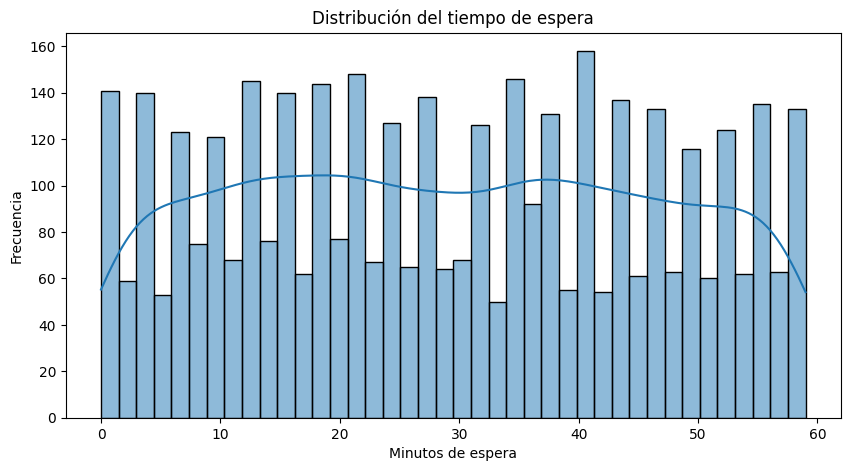

In [8]:
# Distribución de tiempos de espera
plt.figure(figsize=(10,5))
sns.histplot(df["waiting_time_min"], bins=40, kde=True)
plt.title("Distribución del tiempo de espera")
plt.xlabel("Minutos de espera")
plt.ylabel("Frecuencia")
plt.show()

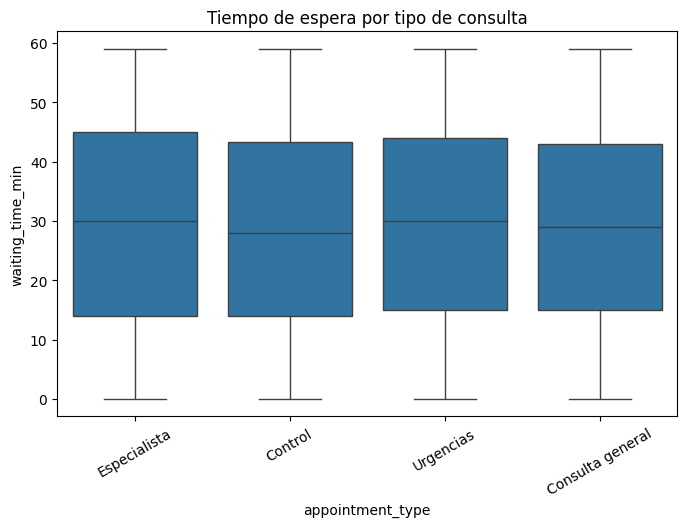

In [9]:
# Tiempo de espera por tipo de consulta
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="appointment_type", y="waiting_time_min")
plt.title("Tiempo de espera por tipo de consulta")
plt.xticks(rotation=30)
plt.show()


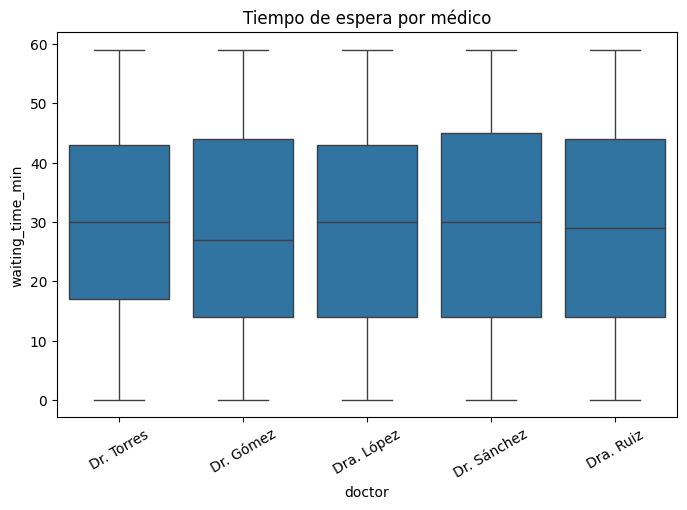

In [10]:
# Tiempo de espera por médico

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="doctor", y="waiting_time_min")
plt.title("Tiempo de espera por médico")
plt.xticks(rotation=30)
plt.show()


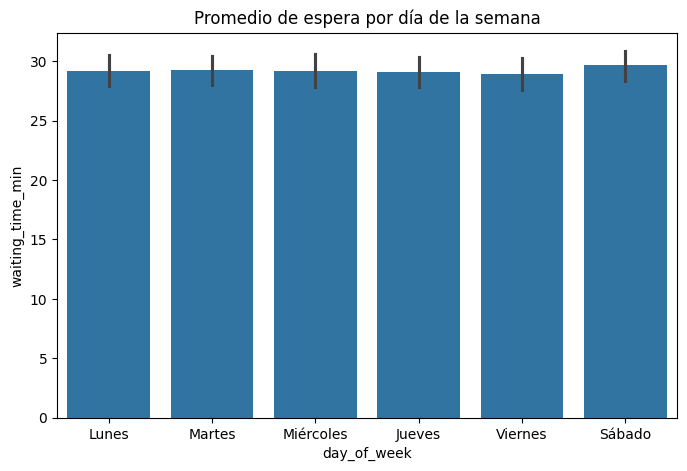

In [11]:
# Días de mayor demanda

df.groupby("day_of_week")["waiting_time_min"].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="day_of_week", y="waiting_time_min",
            order=["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado"])
plt.title("Promedio de espera por día de la semana")
plt.show()

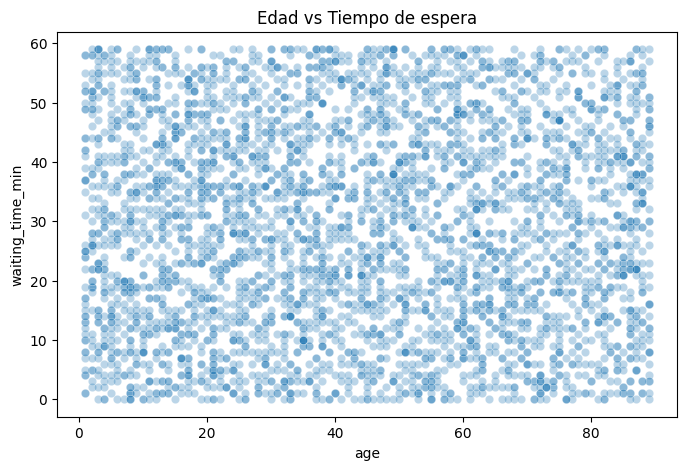

In [12]:
# Relación edad – tiempo de espera
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="age", y="waiting_time_min", alpha=0.3)
plt.title("Edad vs Tiempo de espera")
plt.show()

5️⃣ Conclusiones
1. Los tiempos de espera son moderados pero variables
La mayoría de los pacientes esperan entre 10 y 40 minutos, pero existen casos donde el tiempo supera una hora, lo cual indica puntos de congestión que pueden mejorarse.
2. Urgencias y especialidades generan más variabilidad
Los servicios de Urgencias y Especialista presentan los tiempos más irregulares, lo que sugiere necesidad de ajustes en organización y priorización.
3. Algunos médicos acumulan tiempos mayores de espera
Se identifican médicos con patrones sostenidos de mayor demanda o menor capacidad de atención en ciertos horarios. Esto puede deberse a:
sobrecarga, agenda saturada, tiempos de servicio más largos
4. Los días críticos son martes y jueves Estas jornadas presentan una concentración mayor de llegadas de pacientes y, en consecuencia, aumentan los tiempos de espera.
5. No existe relación clara entre edad y tiempo de espera La edad del paciente no impacta significativamente en cuánto tardan en ser atendidos, lo cual es positivo desde una perspectiva operativa y de equidad.


6️⃣ Propuestas de mejora futura

1. Implementar citas escalonadas para evitar horas pico Programar llegadas de consulta más distribuidas entre 8:00 y 11:00, y entre 2:00 y 4:00, donde se observan congestiones.
2. Añadir un modelo predictivo de espera
Usar machine learning para estimar:
tiempo de espera según hora
tipo de consulta
médico
día de la semana
Ideal para automatización del sistema de citas.
3. Crear un dashboard en Power BI o Dash
Con métricas en tiempo real:
tiempo de espera actual
ocupación por médico
cumplimiento de agenda
Esto mejora la toma de decisiones operativas.